In [1]:
import pandas as pd

# URL del archivo zip que contiene los datos
zip_url = 'https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip'
downloaded_zip_filename = 'predict+students+dropout+and+academic+success.zip'

# Descargar el archivo zip
print(f"Downloading data from: {zip_url}")
!wget {zip_url} -O {downloaded_zip_filename}

# Descomprimir el archivo
print(f"\nUnzipping {downloaded_zip_filename}...")
!unzip -o {downloaded_zip_filename}

# Enumera los archivos para ver el contenido extraído
print("\nFiles extracted:")
!ls

csv_filename_in_zip = 'data.csv'

# Leer el CSV del archivo descomprimido
try:
    # Leer el archivo CSV especificado desde el directorio actual
    # Usando el “;”
    df = pd.read_csv(csv_filename_in_zip, sep=';')

    print("\nSuccessfully loaded the data:")
    print(df.head())

except FileNotFoundError:
     print(f"\nError: The expected CSV file '{csv_filename_in_zip}' was not found after unzipping.")
     print("Please check the output of the '!ls' command above to find the correct CSV filename and update 'csv_filename_in_zip'.")
except pd.errors.ParserError as e:
    print(f"\nError reading '{csv_filename_in_zip}' as CSV: {e}")
    print(f"The file '{csv_filename_in_zip}' could not be parsed as a CSV with separator ';'.")
    print("Please check the file content and separator.")
except Exception as e:
    print(f"\nAn unexpected error occurred while reading the CSV: {e}")

--2025-09-15 14:07:52--  https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘predict+students+dropout+and+academic+success.zip’

predict+students+dr     [  <=>               ] 520.84K  1.58MB/s    in 0.3s    

2025-09-15 14:07:53 (1.58 MB/s) - ‘predict+students+dropout+and+academic+success.zip’ saved [533344]


Unzipping predict+students+dropout+and+academic+success.zip...
Archive:  predict+students+dropout+and+academic+success.zip
 extracting: data.csv                

Files extracted:
data.csv  predict+students+dropout+and+academic+success.zip  sample_data

Successfully loaded the data:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5 

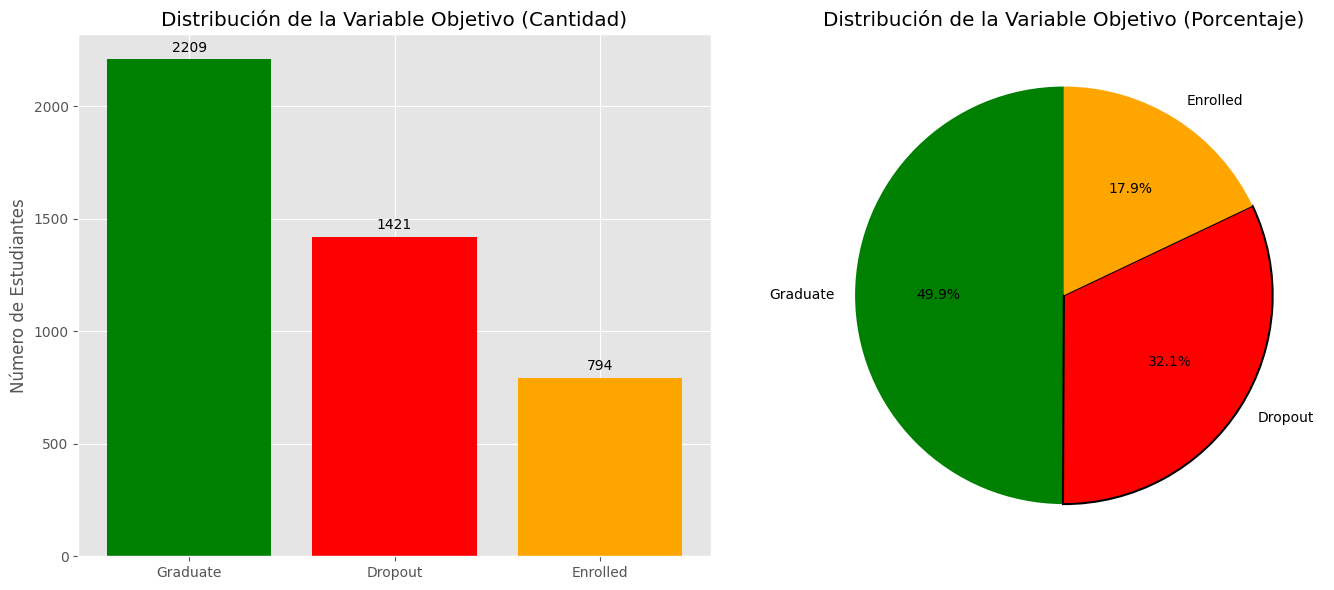

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
labels = ['Graduate', 'Dropout', 'Enrolled']
counts = [2209, 1421, 794]
percentages = [49.93, 32.12, 17.95]
colors = ['green', 'red', 'orange']

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Barras
bars = ax1.bar(labels, counts, color=colors)
ax1.set_title('Distribución de la Variable Objetivo (Cantidad)')
ax1.set_ylabel('Número de Estudiantes')
# Añadir los valores en las barras
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 20, f'{count}', ha='center', va='bottom')

# Gráfico de Pie (tarte)
wedges, texts, autotexts = ax2.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Distribución de la Variable Objetivo (Porcentaje)')
# Resaltar la clase "Dropout"
wedges[1].set_edgecolor('black')
wedges[1].set_linewidth(1.5)

plt.tight_layout()
plt.show()

In [2]:
%%bash
echo "pandas==2.0.3
numpy==1.24.3
scikit-learn==1.3.0
matplotlib==3.7.2
seaborn==0.12.2
xgboost==1.7.6
lightgbm==4.1.0
imbalanced-learn==0.10.1
shap==0.42.1
streamlit==1.28.0
plotly==5.15.0
joblib==1.3.2
scipy==1.11.3" > requirements.txt

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 60.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 101.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


Cargando datos...
Dimensiones del dataset: (4424, 37)

Primeras 5 filas:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                          

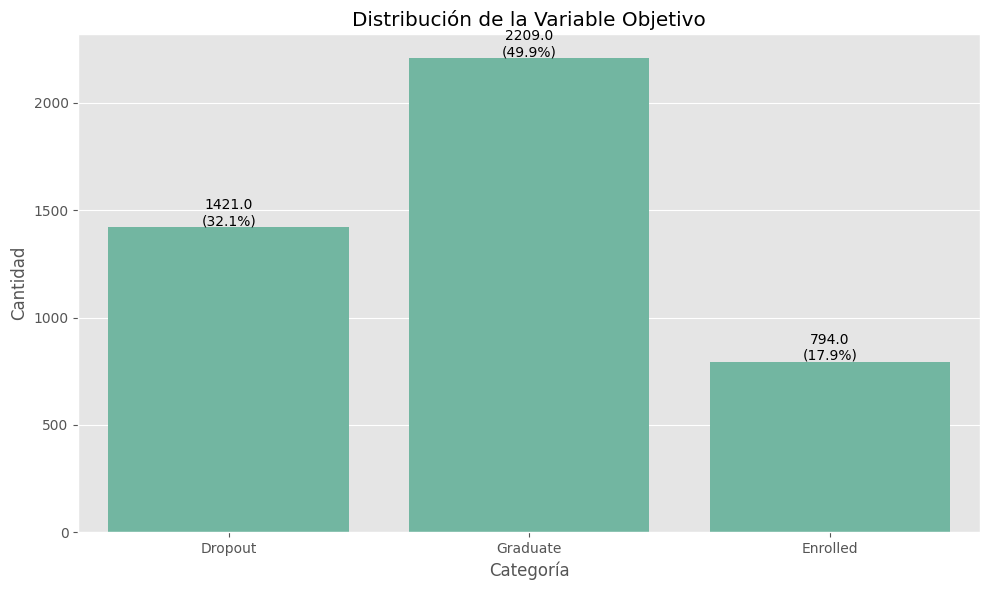


=== MANEJO DE VALORES MISSING ===
Valores missing por columna:
Series([], dtype: int64)
Missing values after treatment: 0

=== CREACIÓN DE NUEVAS CARACTERÍSTICAS ===
Nuevas características creadas:
   performance_ratio_1st_sem  improvement_ratio  academic_load  \
0                   0.000000           0.000000              0   
1                   1.000000          -0.023810             12   
2                   0.000000           0.000000             12   
3                   1.000000          -0.076596             12   
4                   0.833333           0.054054             12   

   success_momentum  academic_efficiency  
0                 0             0.000000  
1                 0             1.000000  
2                 0             0.000000  
3                -1             0.916667  
4                 1             0.916667  

=== PREPROCESAMIENTO DE DATOS ===
Datos preprocesados. Dimensiones: (4424, 41)

=== BALANCEO DE DATOS ===
Dimensiones antes del balanceo: (4424, 

In [4]:
# Análisis Exploratorio y Preprocesamiento
# analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)

class DataPreprocessor:
    def __init__(self):
        self.scaler = RobustScaler()
        self.label_encoder = LabelEncoder()
        self.feature_names = []

    def load_data(self, file_path):
        """Cargar y explorar datos iniciales"""
        print("Cargando datos...")
        # Especificar explícitamente el separador de punto y coma
        self.df = pd.read_csv(file_path, sep=';')

        print(f"Dimensiones del dataset: {self.df.shape}")
        print("\nPrimeras 5 filas:")
        print(self.df.head())

        print("\nInformación del dataset:")
        print(self.df.info())

        print("\nEstadísticas descriptivas:")
        print(self.df.describe())

        return self.df

    def explore_target_variable(self):
        """Análisis de la variable objetivo"""
        print("\n=== ANÁLISIS DE VARIABLE OBJETIVO ===")

        # Distribución de la variable target
        target_dist = self.df['Target'].value_counts()
        print("Distribución de la variable objetivo:")
        print(target_dist)
        print(f"\nPorcentajes: {target_dist / len(self.df) * 100}")

        # Visualización
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x='Target', data=self.df)
        plt.title('Distribución de la Variable Objetivo')
        plt.xlabel('Categoría')
        plt.ylabel('Cantidad')

        # Añadir porcentajes en las barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}\n({p.get_height()/len(self.df)*100:.1f}%)',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

        plt.tight_layout()
        plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        return target_dist

    def handle_missing_values(self):
        """Manejo de valores missing"""
        print("\n=== MANEJO DE VALORES MISSING ===")

        missing_values = self.df.isnull().sum()
        print("Valores missing por columna:")
        print(missing_values[missing_values > 0])

        # Si hay valores faltantes, podemos imputarlos
        if missing_values.sum() > 0:
            # FPara las variables numéricas, imputar con la mediana
            numeric_cols = self.df.select_dtypes(include=[np.number]).columns
            self.df[numeric_cols] = self.df[numeric_cols].fillna(self.df[numeric_cols].median())

            # Para variables categóricas, imputar con la moda
            categorical_cols = self.df.select_dtypes(include=['object']).columns
            self.df[categorical_cols] = self.df[categorical_cols].fillna(self.df[categorical_cols].mode().iloc[0])

        print("Missing values after treatment:", self.df.isnull().sum().sum())
        return self.df

    def create_new_features(self):
        """Crear nuevas características"""
        print("\n=== CREACIÓN DE NUEVAS CARACTERÍSTICAS ===")

        # 1. Ratio de rendimiento primer semestre
        # Maneja la división por cero sustituyendo inf por un número grande y NaN por 0
        self.df['performance_ratio_1st_sem'] = (
            self.df['Curricular units 1st sem (approved)'] /
            self.df['Curricular units 1st sem (enrolled)']
        ).replace([np.inf, -np.inf], np.nan).fillna(0) # Reemplaza inf por NaN primero, luego rellena NaN con 0

        # 2. Mejora entre semestres
        # Maneja la división por cero sustituyendo inf por un número grande y NaN por 0
        # También maneja los casos en los que “Unidades curriculares 1.er semestre (calificación)” es cero
        self.df['improvement_ratio'] = (
            (self.df['Curricular units 2nd sem (grade)'] - self.df['Curricular units 1st sem (grade)']) /
            self.df['Curricular units 1st sem (grade)']
        ).replace([np.inf, -np.inf], np.nan).fillna(0) # Reemplaza inf por NaN primero, luego rellena NaN con 0


        # 3. Carga académica total
        self.df['academic_load'] = (
            self.df['Curricular units 1st sem (enrolled)'] +
            self.df['Curricular units 2nd sem (enrolled)']
        )

        # 4. Momentum de éxito
        self.df['success_momentum'] = (
            self.df['Curricular units 2nd sem (approved)'] -
            self.df['Curricular units 1st sem (approved)']
        )

        # 5. Eficiencia académica
        # Maneja la división por cero sustituyendo inf por un número grande y NaN por 0
        denominator_efficiency = self.df['Curricular units 1st sem (enrolled)'] + self.df['Curricular units 2nd sem (enrolled)']
        self.df['academic_efficiency'] = (
            (self.df['Curricular units 1st sem (approved)'] + self.df['Curricular units 2nd sem (approved)']) /
            denominator_efficiency
        ).replace([np.inf, -np.inf], np.nan).fillna(0) # Reemplaza inf por NaN primero, luego rellena NaN con 0

        print("Nuevas características creadas:")
        print(self.df[['performance_ratio_1st_sem', 'improvement_ratio',
                      'academic_load', 'success_momentum', 'academic_efficiency']].head())

        return self.df

    def preprocess_data(self):
        """Preprocesamiento completo de datos"""
        print("\n=== PREPROCESAMIENTO DE DATOS ===")

        # Codificar variable objetivo
        self.df['Target_encoded'] = self.label_encoder.fit_transform(self.df['Target'])

        # Separar características y target
        X = self.df.drop(['Target', 'Target_encoded'], axis=1)
        y = self.df['Target_encoded']

        # Guardar nombres de características
        self.feature_names = X.columns.tolist()

        # Escalar características numéricas
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        X[numeric_cols] = self.scaler.fit_transform(X[numeric_cols])

        print("Datos preprocesados. Dimensiones:", X.shape)
        return X, y, self.feature_names

    def balance_data(self, X, y):
        """Balancear datos usando SMOTEENN"""
        print("\n=== BALANCEO DE DATOS ===")

        # Maneja los valores potenciales inf o NaN antes de equilibrar.
        X = X.replace([np.inf, -np.inf], np.nan)
        for col in X.columns:
            if X[col].isnull().any():
                # Imputar con la mediana, o con un valor pequeño si la mediana es 0 para las columnas distintas de cero
                median_val = X[col].median()
                if median_val == 0 and X[col].sum() != 0:
                     X[col] = X[col].fillna(1e-9) # Rellenar con un valor pequeño.
                else:
                    X[col] = X[col].fillna(median_val)


        smote_enn = SMOTEENN(random_state=42)
        X_balanced, y_balanced = smote_enn.fit_resample(X, y)

        print(f"Dimensiones antes del balanceo: {X.shape}")
        print(f"Dimensiones después del balanceo: {X_balanced.shape}")

        # Verificar distribución
        unique, counts = np.unique(y_balanced, return_counts=True)
        print("Distribución después del balanceo:", dict(zip(unique, counts)))

        return X_balanced, y_balanced

# Ejecutar análisis exploratorio
if __name__ == "__main__":
    preprocessor = DataPreprocessor()

    # Cargar datos
    df = preprocessor.load_data('data.csv')

    # Explorar variable objetivo
    target_dist = preprocessor.explore_target_variable()

    # Manejar missing values
    df = preprocessor.handle_missing_values()

    # Crear nuevas características
    df = preprocessor.create_new_features()

    # Preprocesar datos
    X, y, feature_names = preprocessor.preprocess_data()

    # Balancear datos
    X_balanced, y_balanced = preprocessor.balance_data(X, y)

    # Guardar datos preprocesados
    pd.DataFrame(X_balanced, columns=feature_names).to_csv('X_balanced.csv', index=False)
    pd.Series(y_balanced).to_csv('y_balanced.csv', index=False)

    print("Análisis exploratorio completado y datos guardados.")

Cargando datos preprocesados...
Train set: (3313, 41), Test set: (829, 41)

=== ENTRENANDO RANDOM FOREST ===
Random Forest CV Accuracy: 0.897 (+/- 0.024)

=== ENTRENANDO XGBOOST ===
XGBoost CV Accuracy: 0.915 (+/- 0.017)

=== ENTRENANDO LightGBM ===
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7595
[LightGBM] [Info] Number of data points in the train set: 2650, number of used features: 41
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

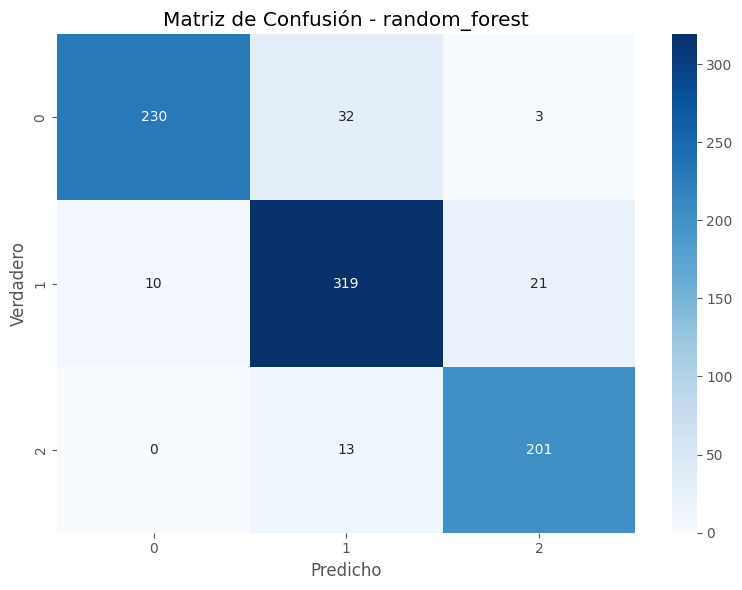


XGBOOST - Accuracy: 0.935
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       265
           1       0.92      0.93      0.93       350
           2       0.94      0.94      0.94       214

    accuracy                           0.93       829
   macro avg       0.94      0.94      0.94       829
weighted avg       0.94      0.93      0.93       829



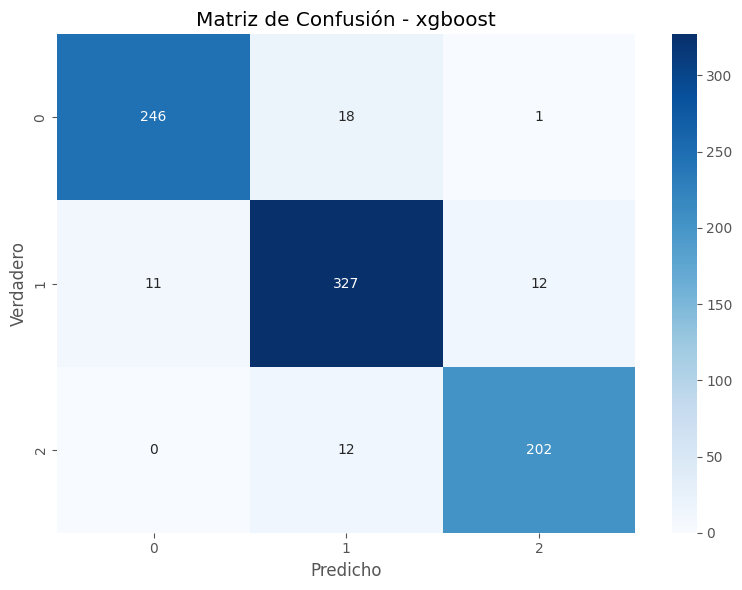


LIGHTGBM - Accuracy: 0.930
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       265
           1       0.93      0.91      0.92       350
           2       0.92      0.97      0.94       214

    accuracy                           0.93       829
   macro avg       0.93      0.93      0.93       829
weighted avg       0.93      0.93      0.93       829



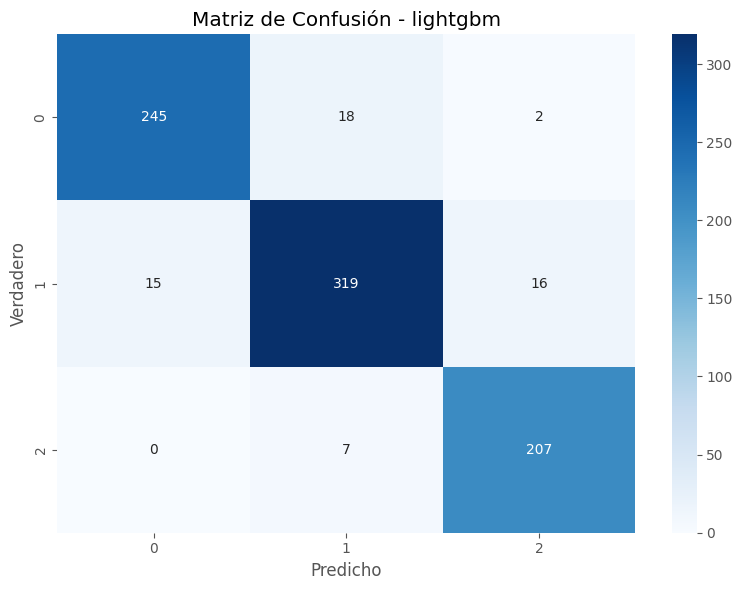


Mejor modelo: xgboost con accuracy: 0.935

=== ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS ===


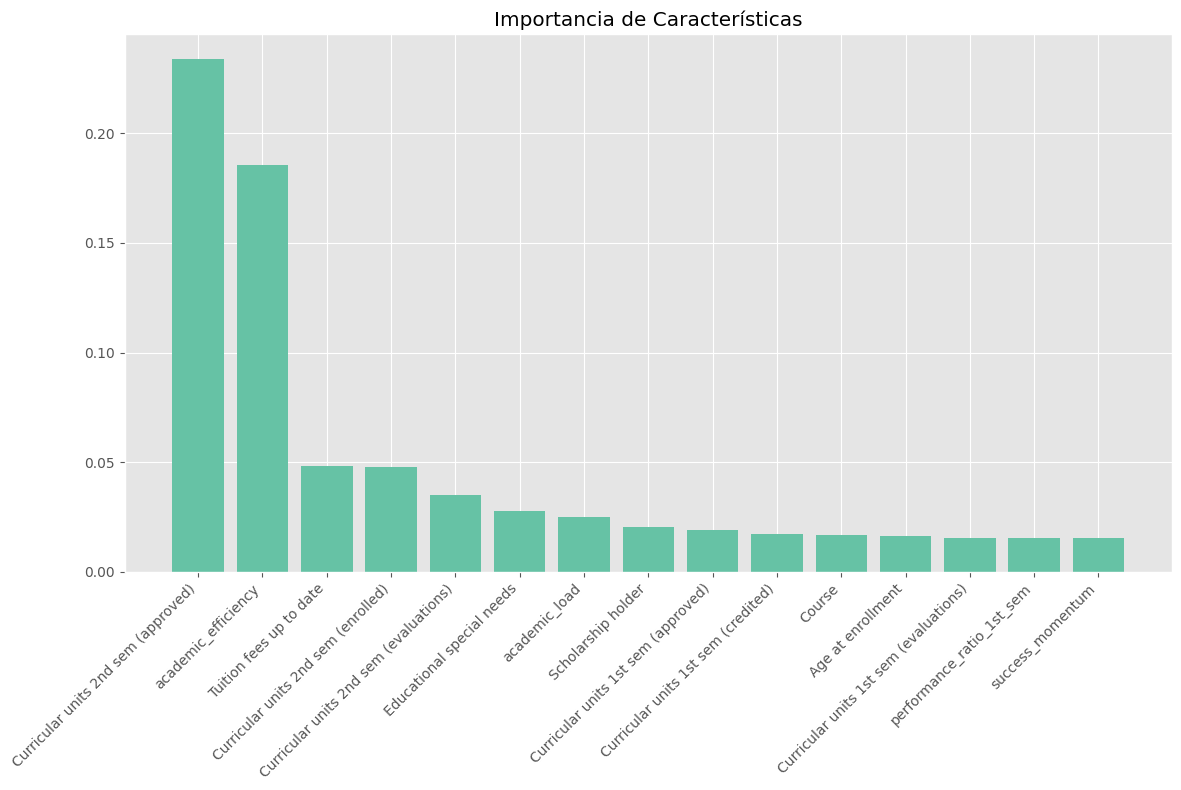

Top 10 características más importantes:
1. Curricular units 2nd sem (approved): 0.2337
2. academic_efficiency: 0.1854
3. Tuition fees up to date: 0.0483
4. Curricular units 2nd sem (enrolled): 0.0481
5. Curricular units 2nd sem (evaluations): 0.0352
6. Educational special needs: 0.0278
7. academic_load: 0.0252
8. Scholarship holder: 0.0204
9. Curricular units 1st sem (approved): 0.0191
10. Curricular units 1st sem (credited): 0.0174

=== GUARDANDO MODELOS ===
Modelo random_forest guardado como random_forest_model.pkl
Modelo xgboost guardado como xgboost_model.pkl
Modelo lightgbm guardado como lightgbm_model.pkl
Mejor modelo guardado como best_model.pkl
Modelado completado exitosamente!


In [13]:
# Modelado y Entrenamiento
# modeling.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

class ModelTrainer:
    def __init__(self):
        self.models = {}
        self.best_model = None
        self.feature_importance = None

    def load_preprocessed_data(self):
        """Cargar datos preprocesados"""
        print("Cargando datos preprocesados...")
        X = pd.read_csv('X_balanced.csv')
        y = pd.read_csv('y_balanced.csv').iloc[:, 0]

        return X, y

    def split_data(self, X, y, test_size=0.2, random_state=42):
        """Dividir datos en train y test"""
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )

        print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
        return X_train, X_test, y_train, y_test

    def train_random_forest(self, X_train, y_train):
        """Entrenar Random Forest"""
        print("\n=== ENTRENANDO RANDOM FOREST ===")

        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            class_weight='balanced'
        )

        # Validación cruzada
        cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
        print(f"Random Forest CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

        # Entrenar modelo final
        rf.fit(X_train, y_train)
        self.models['random_forest'] = rf

        return rf

    def train_xgboost(self, X_train, y_train):
        """Entrenar XGBoost"""
        print("\n=== ENTRENANDO XGBOOST ===")

        xgb = XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            use_label_encoder=False,
            eval_metric='mlogloss'
        )

        cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
        print(f"XGBoost CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

        xgb.fit(X_train, y_train)
        self.models['xgboost'] = xgb

        return xgb

    def train_lightgbm(self, X_train, y_train):
        """Entrenar LightGBM"""
        print("\n=== ENTRENANDO LightGBM ===")

        lgbm = LGBMClassifier(
            n_estimators=100,
            max_depth=7,
            learning_rate=0.05,
            random_state=42,
            class_weight='balanced'
        )

        cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='accuracy')
        print(f"LightGBM CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

        lgbm.fit(X_train, y_train)
        self.models['lightgbm'] = lgbm

        return lgbm

    def evaluate_models(self, X_test, y_test):
        """Evaluar todos los modelos"""
        print("\n=== EVALUACIÓN DE MODELOS ===")

        results = {}

        for name, model in self.models.items():
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            print(f"\n{name.upper()} - Accuracy: {accuracy:.3f}")
            print("Classification Report:")
            print(classification_report(y_test, y_pred))

            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'report': classification_report(y_test, y_pred, output_dict=True)
            }

            # Matriz de confusión
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Matriz de Confusión - {name}')
            plt.ylabel('Verdadero')
            plt.xlabel('Predicho')
            plt.tight_layout()
            plt.savefig(f'confusion_matrix_{name}.png', dpi=300)
            plt.show()

        # Seleccionar mejor modelo
        best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
        self.best_model = results[best_model_name]['model']

        print(f"\nMejor modelo: {best_model_name} con accuracy: {results[best_model_name]['accuracy']:.3f}")

        return results

    def feature_importance_analysis(self, X_train, feature_names):
        """Análisis de importancia de características"""
        print("\n=== ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS ===")

        if self.best_model is None:
            print("No hay modelo entrenado para analizar importancia")
            return

        # Importancia de características
        if hasattr(self.best_model, 'feature_importances_'):
            importances = self.best_model.feature_importances_
            indices = np.argsort(importances)[::-1]

            plt.figure(figsize=(12, 8))
            plt.title("Importancia de Características")
            plt.bar(range(15), importances[indices][:15])
            plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig('feature_importance.png', dpi=300)
            plt.show()

            self.feature_importance = dict(zip(feature_names, importances))

            print("Top 10 características más importantes:")
            for i in range(10):
                print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

    def save_models(self):
        """Guardar modelos entrenados"""
        print("\n=== GUARDANDO MODELOS ===")

        for name, model in self.models.items():
            joblib.dump(model, f'{name}_model.pkl')
            print(f"Modelo {name} guardado como {name}_model.pkl")

        if self.best_model:
            joblib.dump(self.best_model, 'best_model.pkl')
            print("Mejor modelo guardado como best_model.pkl")

# Ejecutar modelado
if __name__ == "__main__":
    trainer = ModelTrainer()

    # Cargar datos preprocesados
    X, y = trainer.load_preprocessed_data()

    # Dividir datos
    X_train, X_test, y_train, y_test = trainer.split_data(X, y)

    # Entrenar modelos
    rf = trainer.train_random_forest(X_train, y_train)
    xgb = trainer.train_xgboost(X_train, y_train)
    lgbm = trainer.train_lightgbm(X_train, y_train)

    # Evaluar modelos
    results = trainer.evaluate_models(X_test, y_test)

    # Análisis de importancia
    trainer.feature_importance_analysis(X_train, X.columns.tolist())

    # Guardar modelos
    trainer.save_models()

    print("Modelado completado exitosamente!")

In [6]:
# Validar con Datos Reales
# Validación cruzada más robusta
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(trainer.best_model, X_balanced, y_balanced, cv=10, scoring=scoring)

print(f"Accuracy promedio: {scores['test_accuracy'].mean():.3f}")
print(f"Precision promedio: {scores['test_precision_macro'].mean():.3f}")
print(f"Recall promedio: {scores['test_recall_macro'].mean():.3f}")
print(f"F1-score promedio: {scores['test_f1_macro'].mean():.3f}")

Accuracy promedio: 0.930
Precision promedio: 0.936
Recall promedio: 0.930
F1-score promedio: 0.931


=== MATRIZ DE CORRELACIÓN CON TARGET ===
Correlación con Variable Target:
Target                              1.000000
academic_efficiency                 0.781711
performance_ratio_1st_sem           0.721268
Curricular units 2nd sem (grade)    0.707100
Curricular units 1st sem (grade)    0.606993
improvement_ratio                   0.283829
Admission grade                     0.176098
Previous qualification (grade)      0.162492
Age at enrollment                  -0.340605
Name: Target, dtype: float64


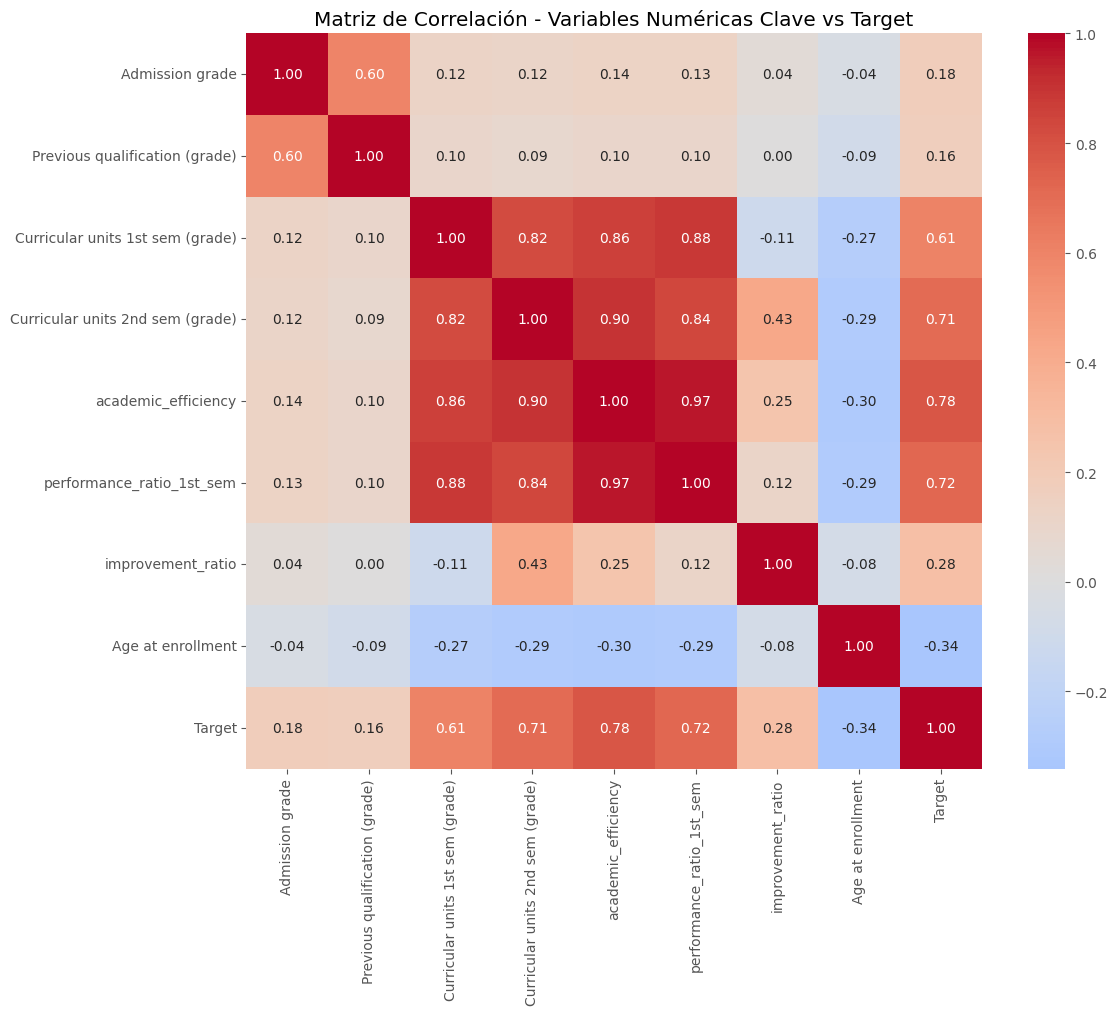


=== BOXPLOTS POR CATEGORÍA ===


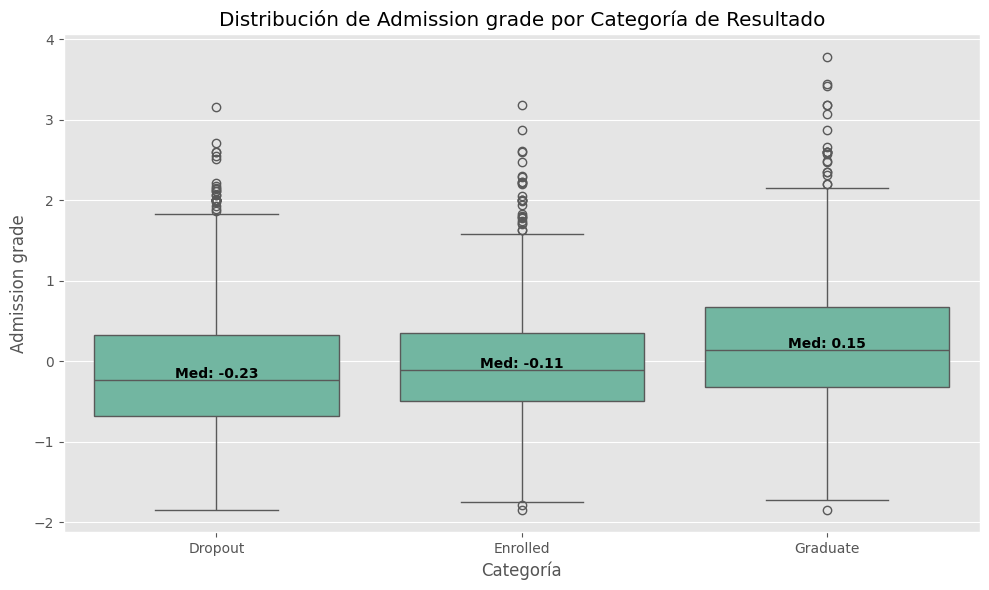


Estadísticas para Admission grade:
               count      mean       std       min       25%       50%  \
Target_Label                                                             
Dropout       1326.0 -0.129277  0.838996 -1.840237 -0.679556 -0.229309   
Enrolled      1747.0 -0.047122  0.684462 -1.840237 -0.487873 -0.107777   
Graduate      1069.0  0.245997  0.822815 -1.840237 -0.313609  0.147929   

                   75%       max  
Target_Label                      
Dropout       0.333087  3.165680  
Enrolled      0.354721  3.189349  
Graduate      0.680473  3.781065  


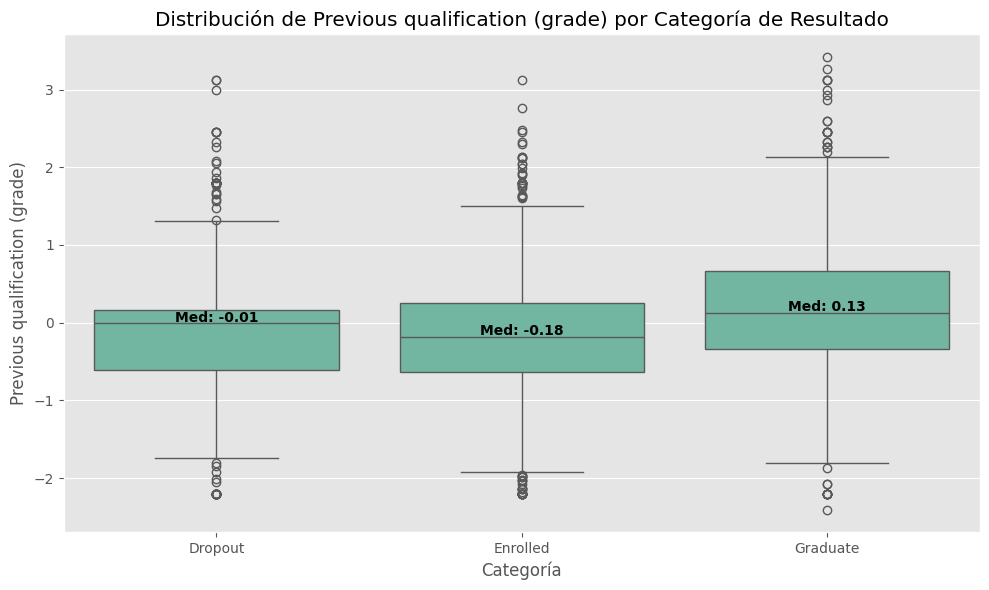


Estadísticas para Previous qualification (grade):
               count      mean       std       min       25%       50%  \
Target_Label                                                             
Dropout       1326.0 -0.162102  0.759290 -2.206667 -0.606667 -0.006667   
Enrolled      1747.0 -0.172849  0.714942 -2.206667 -0.629588 -0.181891   
Graduate      1069.0  0.194867  0.886234 -2.406667 -0.340000  0.126667   

                   75%       max  
Target_Label                      
Dropout       0.159062  3.126667  
Enrolled      0.254289  3.126667  
Graduate      0.660000  3.420000  


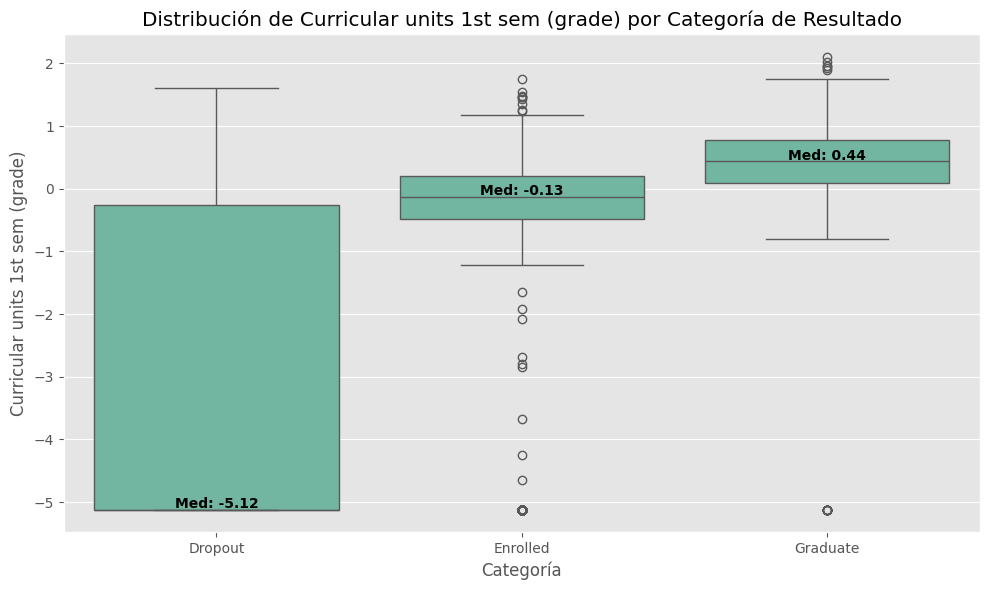


Estadísticas para Curricular units 1st sem (grade):
               count      mean       std       min       25%       50%  \
Target_Label                                                             
Dropout       1326.0 -3.037882  2.482851 -5.119048 -5.119048 -5.119048   
Enrolled      1747.0 -0.392384  1.303292 -5.119048 -0.478467 -0.127107   
Graduate      1069.0  0.392142  0.743816 -5.119048  0.089286  0.436508   

                   75%       max  
Target_Label                      
Dropout      -0.262298  1.607143  
Enrolled      0.209544  1.755952  
Graduate      0.773140  2.103175  


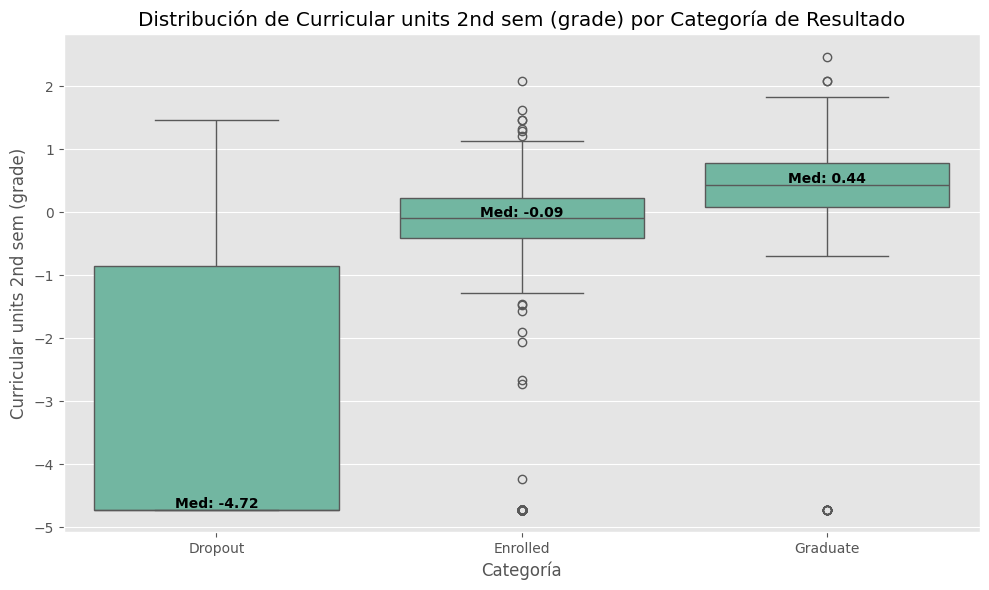


Estadísticas para Curricular units 2nd sem (grade):
               count      mean       std       min       25%       50%  \
Target_Label                                                             
Dropout       1326.0 -3.556779  2.011874 -4.722581 -4.722581 -4.722581   
Enrolled      1747.0 -0.315805  1.177433 -4.722581 -0.401579 -0.089758   
Graduate      1069.0  0.410586  0.709591 -4.722581  0.089585  0.436866   

                   75%       max  
Target_Label                      
Dropout      -0.851613  1.470968  
Enrolled      0.222851  2.090323  
Graduate      0.786290  2.466359  


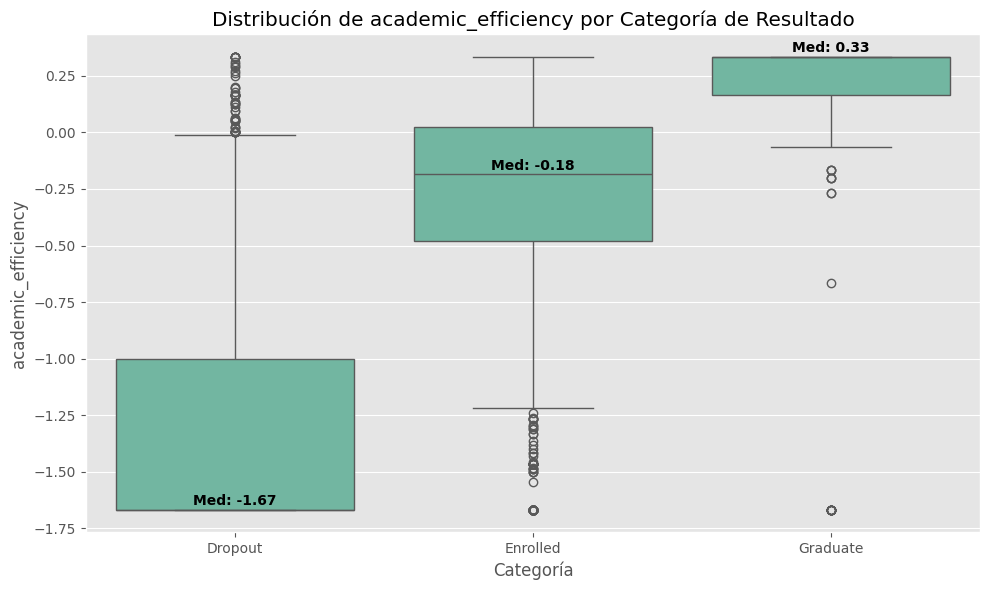


Estadísticas para academic_efficiency:
               count      mean       std       min       25%       50%  \
Target_Label                                                             
Dropout       1326.0 -1.293763  0.551610 -1.666667 -1.666667 -1.666667   
Enrolled      1747.0 -0.294061  0.469743 -1.666667 -0.478388 -0.184488   
Graduate      1069.0  0.228952  0.231847 -1.666667  0.166667  0.333333   

                   75%       max  
Target_Label                      
Dropout      -1.000600  0.333333  
Enrolled      0.025641  0.333333  
Graduate      0.333333  0.333333  


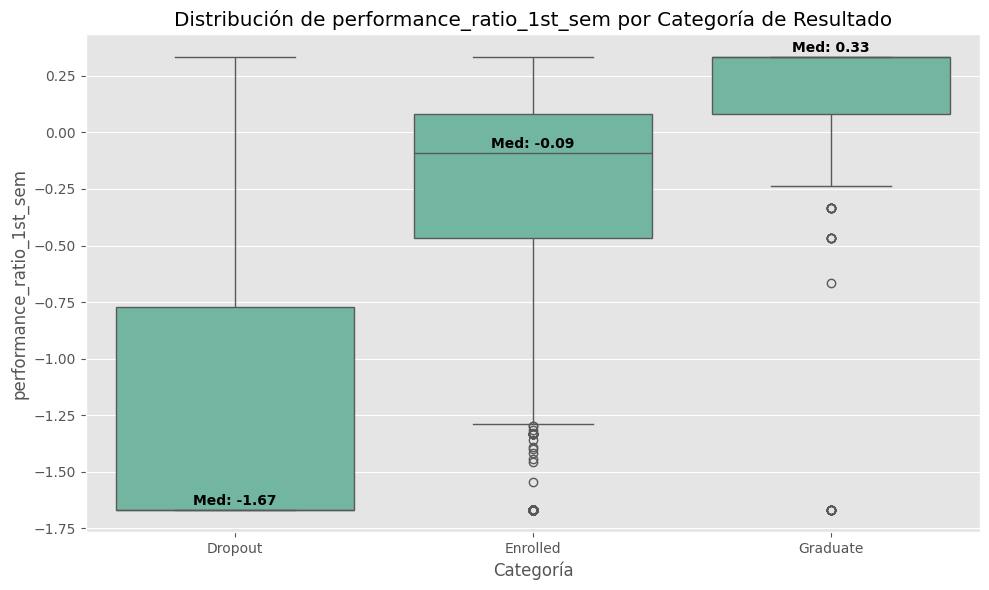


Estadísticas para performance_ratio_1st_sem:
               count      mean       std       min       25%       50%  \
Target_Label                                                             
Dropout       1326.0 -1.200655  0.644336 -1.666667 -1.666667 -1.666667   
Enrolled      1747.0 -0.254836  0.528367 -1.666667 -0.466667 -0.090644   
Graduate      1069.0  0.228927  0.243016 -1.666667  0.083333  0.333333   

                   75%       max  
Target_Label                      
Dropout      -0.771193  0.333333  
Enrolled      0.083333  0.333333  
Graduate      0.333333  0.333333  


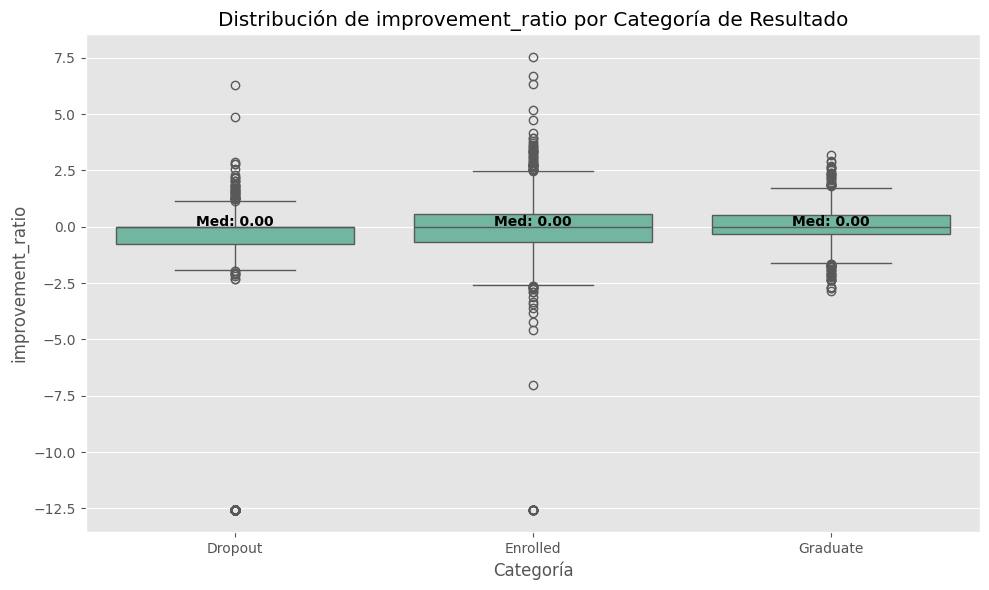


Estadísticas para improvement_ratio:
               count      mean       std        min       25%  50%       75%  \
Target_Label                                                                   
Dropout       1326.0 -2.222530  4.793604 -12.555818 -0.768118  0.0  0.000000   
Enrolled      1747.0 -0.143412  1.823721 -12.555818 -0.700874  0.0  0.569163   
Graduate      1069.0  0.054205  0.834168  -2.863608 -0.343947  0.0  0.515993   

                   max  
Target_Label            
Dropout       6.277909  
Enrolled      7.533491  
Graduate      3.164474  


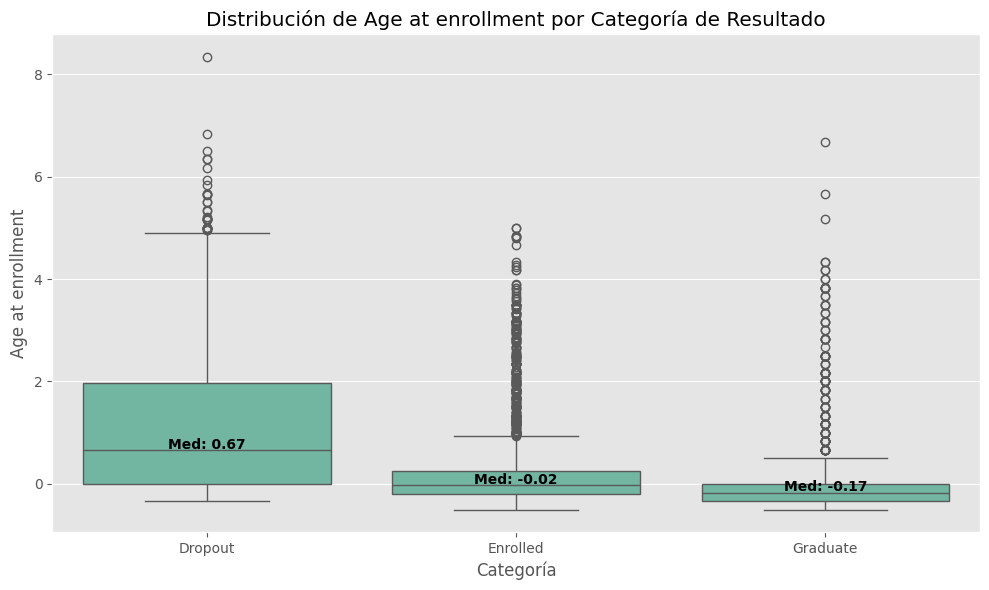


Estadísticas para Age at enrollment:
               count      mean       std       min       25%       50%  \
Target_Label                                                             
Dropout       1326.0  1.145828  1.474441 -0.333333 -0.006520  0.666667   
Enrolled      1747.0  0.283175  0.906397 -0.500000 -0.202610 -0.021408   
Graduate      1069.0  0.107577  0.838446 -0.500000 -0.333333 -0.166667   

                   75%       max  
Target_Label                      
Dropout       1.974523  8.333333  
Enrolled      0.256493  5.000000  
Graduate      0.000000  6.666667  


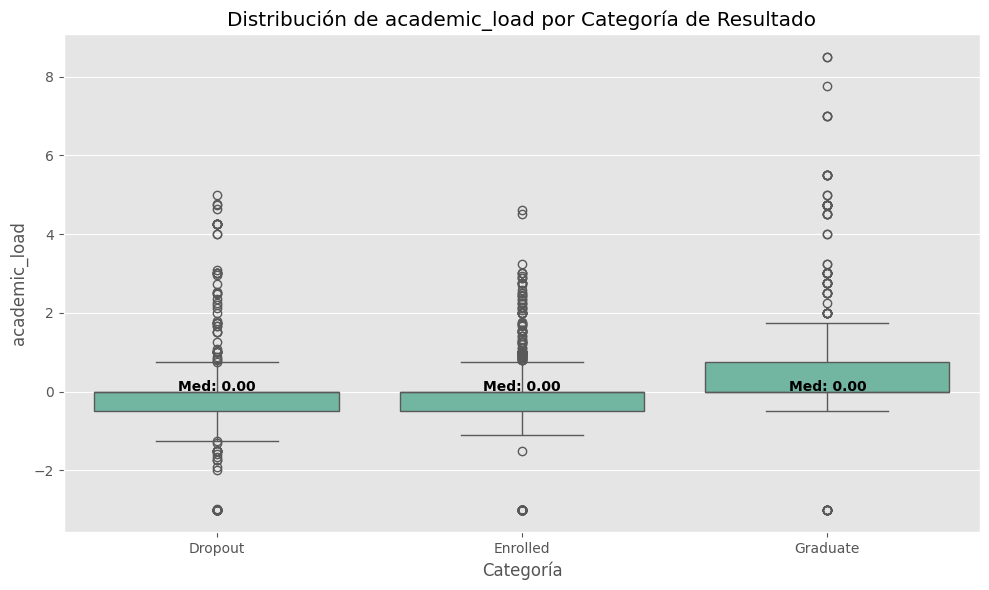


Estadísticas para academic_load:
               count      mean       std  min  25%  50%   75%       max
Target_Label                                                           
Dropout       1326.0 -0.123251  0.870659 -3.0 -0.5  0.0  0.00  5.000000
Enrolled      1747.0 -0.100491  0.764579 -3.0 -0.5  0.0  0.00  4.614238
Graduate      1069.0  0.460711  1.133411 -3.0  0.0  0.0  0.75  8.500000

=== ANÁLISIS ESTADÍSTICO DE DIFERENCIAS ===

--- Anova para Admission grade ---
F-statistic: 75.887, p-value: 0.0000
Diferencias estadísticamente significativas entre grupos
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
 Dropout Enrolled   0.0822 0.0099 0.0161 0.1482   True
 Dropout Graduate   0.3753    0.0 0.3008 0.4498   True
Enrolled Graduate   0.2931    0.0 0.2227 0.3635   True
------------------------------------------------------

--- Anova para Previous qualification (grade)

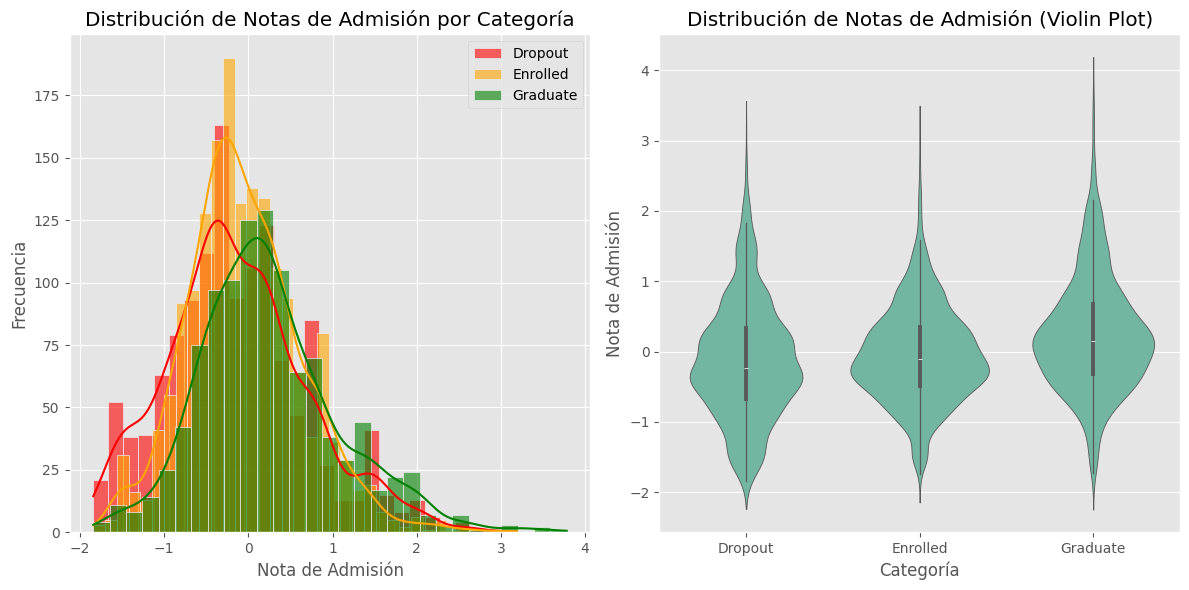

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('ggplot')
sns.set_palette("Set2")

# Cargar datos preprocesados
df = pd.read_csv('X_balanced.csv')
target = pd.read_csv('y_balanced.csv').iloc[:, 0]

# Añadir la variable objetivo al dataframe
df['Target'] = target

# Mapear los valores numéricos a labels para mejor visualización
target_map = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
df['Target_Label'] = df['Target'].map(target_map)

# 1. MATRIZ DE CORRELACIÓN con variables numéricas clave y el target
print("=== MATRIZ DE CORRELACIÓN CON TARGET ===")

# Seleccionar variables numéricas clave para correlación con target
key_numeric_vars = [
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'academic_efficiency',
    'performance_ratio_1st_sem',
    'improvement_ratio',
    'Age at enrollment',
    'Target'  # Incluir el target
]

# Filtrar solo las variables que existen en el dataframe
existing_vars = [var for var in key_numeric_vars if var in df.columns]
correlation_matrix = df[existing_vars].corr()

# Mostrar correlación con target ordenada
target_correlation = correlation_matrix['Target'].sort_values(ascending=False)
print("Correlación con Variable Target:")
print(target_correlation)

# Visualizar matriz de correlación completa
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas Clave vs Target')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. BOXPLOTS por Clase para características importantes
print("\n=== BOXPLOTS POR CATEGORÍA ===")

# Variables clave para visualizar
key_variables = [
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'academic_efficiency',
    'performance_ratio_1st_sem',
    'improvement_ratio',
    'Age at enrollment',
    'academic_load'
]

# Filtrar variables existentes
existing_key_vars = [var for var in key_variables if var in df.columns]

# Crear boxplots para cada variable
for variable in existing_key_vars:
    plt.figure(figsize=(10, 6))

    # Crear boxplot
    sns.boxplot(x='Target_Label', y=variable, data=df,
                order=['Dropout', 'Enrolled', 'Graduate'])

    # Añadir estadísticas descriptivas
    plt.title(f'Distribución de {variable} por Categoría de Resultado')
    plt.xlabel('Categoría')
    plt.ylabel(variable)

    # Calcular y mostrar medianas
    medians = df.groupby('Target_Label')[variable].median()
    for i, category in enumerate(['Dropout', 'Enrolled', 'Graduate']):
        if category in medians.index:
            plt.text(i, medians[category] + 0.02, f'Med: {medians[category]:.2f}',
                    horizontalalignment='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig(f'boxplot_{variable.replace(" ", "_").replace("/", "_")}.png',
                dpi=300, bbox_inches='tight')
    plt.show()

    # Mostrar estadísticas descriptivas por grupo
    print(f"\nEstadísticas para {variable}:")
    stats = df.groupby('Target_Label')[variable].describe()
    print(stats)

# 3. ANÁLISIS ESTADÍSTICO de diferencias entre grupos
print("\n=== ANÁLISIS ESTADÍSTICO DE DIFERENCIAS ===")

from scipy import stats

for variable in existing_key_vars[:4]:  # Analizar solo las primeras 4 variables clave
    print(f"\n--- Anova para {variable} ---")

    # Separar datos por grupo
    dropout_data = df[df['Target_Label'] == 'Dropout'][variable].dropna()
    enrolled_data = df[df['Target_Label'] == 'Enrolled'][variable].dropna()
    graduate_data = df[df['Target_Label'] == 'Graduate'][variable].dropna()

    # Test ANOVA
    f_stat, p_value = stats.f_oneway(dropout_data, enrolled_data, graduate_data)
    print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Diferencias estadísticamente significativas entre grupos")

        # Test post-hoc de Tukey para ver entre qué grupos hay diferencias
        from statsmodels.stats.multicomp import pairwise_tukeyhsd

        tukey = pairwise_tukeyhsd(
            df[variable].dropna(),
            df['Target_Label'].dropna(),
            alpha=0.05
        )
        print(tukey)
    else:
        print("No hay diferencias estadísticamente significativas")

# 4. GRÁFICO ADICIONAL: Distribución de notas de admisión
plt.figure(figsize=(12, 6))

# Histograma superpuesto
plt.subplot(1, 2, 1)
for category, color in zip(['Dropout', 'Enrolled', 'Graduate'], ['red', 'orange', 'green']):
    subset = df[df['Target_Label'] == category]
    sns.histplot(subset['Admission grade'], label=category,
                 alpha=0.6, kde=True, color=color)
plt.title('Distribución de Notas de Admisión por Categoría')
plt.xlabel('Nota de Admisión')
plt.ylabel('Frecuencia')
plt.legend()

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Target_Label', y='Admission grade', data=df,
               order=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Distribución de Notas de Admisión (Violin Plot)')
plt.xlabel('Categoría')
plt.ylabel('Nota de Admisión')

plt.tight_layout()
plt.savefig('admission_grade_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Análisis de Errores
# Identificar dónde falla el modelo
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Recrear la división entre entrenamiento y prueba a partir de datos equilibrados
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

y_pred = trainer.best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Analizar falsos negativos (estudiantes que abandonaron pero predijimos que no)
false_negatives = X_test[(y_test == 0) & (y_pred != 0)]
print(f"Falsos negativos (riesgo no detectado): {len(false_negatives)}")

Falsos negativos (riesgo no detectado): 19


In [19]:
# Mostrar las primeras filas de los falsos negativos.
print("Primeros 5 falsos negativos:")
display(false_negatives.head())

# Mostrar estadísticas descriptivas para columnas numéricas en falsos negativos
print("\nEstadísticas descriptivas para características numéricas en falsos negativos:")
display(false_negatives.describe())

# Explorar los recuentos de valores para las características categóricas, si las hay.
print("\nContar los 'Marital status' en los Falsos Negativos:")
display(false_negatives['Marital status'].value_counts())

Primeros 5 falsos negativos:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,performance_ratio_1st_sem,improvement_ratio,academic_load,success_momentum,academic_efficiency
1025,0.0,0.710526,0.0,-0.264433,0.0,38.0,0.528805,0.0,-0.478156,-0.529412,-0.252906,-0.347094,0.883555,0.0,0.367736,0.632264,-0.367736,1.000000,0.000000,-0.061289,0.0,2.0,0.000000,-0.025802,-0.088176,-0.076045,0.0,1.0,0.000000,1.066132,-0.224198,-0.190225,0.0,0.288889,-0.391304,0.421203,-0.088176,-0.405464,0.000000,-0.632264,-0.193554
563,0.0,0.578947,0.0,0.556263,0.0,0.0,-0.206667,0.0,0.000000,0.000000,0.800000,0.200000,-1.201183,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.500000,1.000000,-0.666667,0.617063,0.0,0.0,0.500000,0.750000,-0.500000,-0.051613,0.0,0.622222,-0.739130,0.134670,-0.809524,-1.550476,0.500000,0.000000,-0.809524
392,0.0,-0.421053,2.0,1.135881,0.0,0.0,0.860000,0.0,0.542857,0.558824,0.800000,0.000000,0.473373,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,-0.333333,0.0,0.0,0.000000,-0.500000,0.333333,0.089286,0.0,0.0,0.000000,-0.250000,0.250000,0.180645,0.0,-0.066667,0.000000,0.406877,0.333333,0.167411,0.000000,0.000000,0.333333
1289,0.0,-0.421053,2.0,1.061422,0.0,0.0,0.808615,0.0,0.539187,0.555045,0.800000,0.051385,0.529623,0.0,0.000000,0.128463,-0.128463,0.871537,0.871537,-0.311923,0.0,0.0,0.128463,-0.435768,0.376154,0.133560,0.0,0.0,0.128463,-0.217884,0.282116,0.213489,0.0,-0.066667,0.000000,0.406877,0.301218,0.145905,0.128463,0.000000,0.301218
1021,0.0,-0.209839,2.0,1.221084,0.0,0.0,0.592463,0.0,0.528525,0.544070,0.398694,0.200653,0.206231,0.0,0.501632,0.000000,0.000000,0.498368,1.000000,-0.249728,0.0,0.0,0.000000,-0.500000,0.333333,0.298299,0.0,0.0,0.000000,-0.124592,0.124592,0.206536,0.0,0.145134,0.501632,-0.087569,0.333333,-0.243152,0.000000,-0.501632,0.249728



Estadísticas descriptivas para características numéricas en falsos negativos:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,performance_ratio_1st_sem,improvement_ratio,academic_load,success_momentum,academic_efficiency
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.116163,0.224893,0.799693,0.453879,-0.097350,6.129003,-0.015594,0.0,0.104367,0.159788,0.376350,-0.217234,0.253145,-0.417468,0.045756,0.145301,-0.078747,0.691384,0.151134,0.936414,0.0,0.328512,0.082013,0.463356,-0.194800,-0.000004,0.106147,0.170618,0.108328,0.494924,-0.200296,-0.004446,0.263158,0.259408,-0.324918,0.049684,-0.237505,-0.080632,0.095171,-0.216785,-0.281498
std,0.287997,0.469412,1.254871,0.632448,0.292673,14.189744,0.630334,0.0,0.426533,0.435697,0.467673,0.327528,0.692892,0.463020,0.138862,0.334591,0.239665,0.441782,0.359443,1.629096,0.0,0.780843,0.361432,0.710631,0.455489,0.337685,0.269715,0.407486,0.408671,0.562636,0.400679,0.432317,0.933459,0.395263,0.474833,0.482797,0.416395,0.988076,0.381488,0.921950,0.407803
min,0.000000,-0.421053,0.000000,-0.356688,-1.000000,0.000000,-1.147379,0.0,-0.488383,-0.529412,-0.400000,-0.800000,-1.201183,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-0.333333,0.0,0.000000,-0.500000,-0.500000,-1.182981,-0.535714,0.000000,0.000000,-0.500000,-0.250000,-0.750000,-0.851613,0.000000,-0.377778,-0.956522,-0.985673,-1.086244,-2.092636,-0.500000,-2.483474,-0.886244
25%,0.000000,-0.224021,0.000000,-0.128166,0.000000,0.000000,-0.420055,0.0,-0.302442,-0.201585,0.017786,-0.385623,-0.287559,-1.000000,0.000000,0.000000,0.000000,0.249184,0.000000,-0.149852,0.0,0.000000,0.000000,-0.043118,-0.496133,-0.248285,0.000000,0.000000,0.000000,-0.060434,-0.500000,-0.224221,0.000000,-0.041120,-0.603019,-0.121047,-0.470238,-0.588065,0.000000,-0.699328,-0.543044
50%,0.000000,0.428595,0.000000,0.556263,0.000000,0.000000,-0.103655,0.0,0.223338,0.229907,0.558263,-0.253289,0.396450,-0.233608,0.000000,0.000000,0.000000,1.000000,0.000000,0.030077,0.0,0.000000,0.000000,0.500000,-0.172175,-0.035673,0.000000,0.000000,0.000000,0.583250,-0.224198,-0.027288,0.000000,0.288889,-0.391304,0.230229,-0.231094,0.000000,0.000000,-0.333002,-0.336386
75%,0.000000,0.578947,1.445822,1.098651,0.000000,0.000000,0.494402,0.0,0.514286,0.541071,0.800000,0.025693,0.546326,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.730073,0.0,0.000000,0.208764,1.000000,0.171871,0.211345,0.000000,0.000000,0.208764,0.948779,0.000000,0.212587,0.000000,0.537978,-0.133286,0.414040,0.111930,0.447898,0.208764,0.217134,0.006759
max,1.000000,0.737334,4.093422,1.598726,0.000000,38.000000,0.860000,0.0,0.542857,0.572156,0.800000,0.459835,1.739645,0.000000,0.501632,1.000000,0.000000,1.000000,1.000000,4.830737,0.0,2.241737,1.000000,1.500000,0.484430,0.630952,1.000000,1.241737,1.000000,1.334366,0.750000,0.696774,4.000000,0.923896,1.000000,0.487106,0.333333,1.828126,1.000000,1.546711,0.333333



Contar los 'Marital status' en los Falsos Negativos:


,count
Marital status,
0.000000,16
1.000000,1
0.705534,1
0.501558,1


In [18]:
# Identificar falsos positivos (predicción de abandono, pero en realidad no hubo abandono)
# Recuerdar que 0 corresponde a "Abandono" en nuestro objetivo codificado
false_positives = X_test[(y_test != 0) & (y_pred == 0)]

print(f"Falsos positivos (predicir Dropout, pero no hubo Dropout): {len(false_positives)}")

# Visualizar las primeras filas de los falsos positivos
print("\nPrimeras 5 columnas de los Falsos Positivos:")
display(false_positives.head())

# Visualizar estadísticas descriptivas para columnas numéricas en falsos positivos
print("\nEstadísticas descriptivas para características numéricas en falsos positivos:")
display(false_positives.describe())

# Explorar los recuentos de valores para las características categóricas, si las hay
print("\nContar valores de los 'Marital status' en los False Positives:")
display(false_positives['Marital status'].value_counts())

Falsos positivos (predicir Dropout, pero no hubo Dropout): 11

Primeras 5 columnas de los Falsos Positivos:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,performance_ratio_1st_sem,improvement_ratio,academic_load,success_momentum,academic_efficiency
2103,0.0,0.151768,0.0,-0.273352,0.0,0.0,0.290223,0.0,-0.244652,0.551113,0.042713,-0.095142,0.824547,-0.262144,0.0,1.0,0.0,0.737856,0.262144,0.190955,0.0,0.0,-0.368928,0.053392,-1.666667,-5.119048,0.0,0.0,-0.368928,-0.684464,-1.25,-4.722581,0.0,-0.573888,0.293788,0.127692,-1.666667,0.000000,-0.368928,0.0,-1.666667
1636,1.0,0.578947,1.0,0.675159,0.0,0.0,-1.540000,0.0,0.000000,0.558824,0.800000,0.400000,-0.786982,-1.000000,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.500000,-0.250000,-1.666667,-5.119048,0.0,0.0,1.000000,0.000000,-1.25,-4.722581,6.0,-0.066667,0.000000,0.406877,-1.666667,0.000000,0.750000,0.0,-1.666667
2469,0.0,-0.052969,0.0,-19.250531,0.0,0.0,-0.162629,0.0,0.000000,-0.353103,0.800000,0.066972,-0.282058,-0.333028,0.0,0.0,0.0,1.000000,0.000000,0.111009,0.0,0.0,-3.000000,-2.000000,-1.666667,-5.119048,0.0,0.0,-3.000000,-2.000000,-1.25,-4.722581,0.0,0.162753,-0.246151,0.316224,-1.666667,0.000000,-3.000000,0.0,-1.666667
1535,0.0,0.684211,0.0,-0.324841,0.0,0.0,-0.206667,0.0,0.000000,0.558824,-0.200000,0.400000,0.230769,0.000000,0.0,0.0,-1.0,0.000000,0.000000,-0.166667,0.0,0.0,0.000000,1.000000,0.000000,0.297619,0.0,0.0,0.000000,1.000000,-0.50,-0.206452,0.0,0.622222,-0.739130,0.134670,0.000000,-1.287776,0.000000,-2.0,-0.333333
1665,0.0,0.578947,0.0,-2.598726,-1.0,0.0,1.460000,0.0,0.000000,0.529412,-0.200000,-0.400000,-0.508876,-1.000000,0.0,0.0,0.0,0.000000,0.000000,2.333333,0.0,0.0,0.000000,-0.500000,-0.333333,0.401786,0.0,0.0,0.000000,-0.500000,-1.25,-4.722581,0.0,0.355556,1.000000,-0.578797,-0.333333,-12.555818,0.000000,-4.0,-1.000000



Estadísticas descriptivas para características numéricas en falsos positivos:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,performance_ratio_1st_sem,improvement_ratio,academic_load,success_momentum,academic_efficiency
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.090909,0.338653,0.371924,-1.969702,-0.090909,0.0,-0.133930,0.0,-0.169627,0.139357,0.192202,-0.147415,-0.083871,-0.599561,0.0,0.272727,-0.228491,0.568296,0.258173,0.548600,0.0,0.454545,-0.056875,0.144772,-0.845722,-2.854639,0.727273,0.0,-0.193239,0.002763,-0.909874,-2.809085,1.352217,-0.018669,-0.380745,-0.275387,-0.942692,-1.546437,-0.125057,-1.102328,-1.069218
std,0.301511,0.445525,0.516627,5.794905,0.301511,0.0,0.804335,0.0,0.232633,0.420614,0.420887,0.609961,0.430075,0.471743,0.0,0.467099,0.411010,0.474915,0.397570,0.870942,0.0,1.507557,1.211050,1.171934,0.995540,2.617385,2.412091,0.0,1.050773,0.892178,0.408564,2.209546,2.839915,0.416179,0.628006,0.595987,0.837126,3.699360,1.088231,1.847888,0.657562
min,0.000000,-0.421053,0.000000,-19.250531,-1.000000,0.0,-1.540000,0.0,-0.514286,-0.529412,-0.200000,-1.200000,-0.786982,-1.000000,0.0,0.000000,-1.000000,0.000000,0.000000,-0.333333,0.0,0.000000,-3.000000,-2.000000,-1.666667,-5.119048,0.000000,0.0,-3.000000,-2.000000,-1.250000,-4.722581,0.000000,-0.573888,-0.956522,-0.985673,-1.666667,-12.555818,-3.000000,-4.000000,-1.666667
25%,0.000000,0.049400,0.000000,-0.348668,0.000000,0.0,-0.552155,0.0,-0.379469,-0.156074,-0.190884,-0.408041,-0.303017,-1.000000,0.0,0.000000,-0.256701,0.000000,0.000000,-0.027829,0.0,0.000000,-0.312815,-0.484298,-1.666667,-5.119048,0.000000,0.0,-0.312815,-0.435825,-1.250000,-4.722581,0.000000,-0.377778,-0.912921,-0.922198,-1.666667,-1.028157,-0.312815,-2.000000,-1.666667
50%,0.000000,0.578947,0.000000,-0.226664,0.000000,0.0,-0.162629,0.0,-0.013785,0.000000,0.042713,-0.095142,-0.118343,-1.000000,0.0,0.000000,0.000000,0.737856,0.000000,0.166667,0.0,0.000000,0.000000,0.000000,-1.666667,-5.119048,0.000000,0.0,0.000000,0.000000,-1.250000,-4.722581,0.000000,-0.066667,-0.548723,0.073658,-1.666667,0.000000,0.000000,0.000000,-1.291789
75%,0.000000,0.658600,1.000000,0.074230,0.000000,0.0,0.241778,0.0,0.000000,0.540263,0.518597,0.400000,0.142469,-0.131072,0.0,0.500000,0.000000,1.000000,0.374371,1.204983,0.0,0.000000,0.250000,0.943022,0.000000,-0.425217,0.000000,0.0,0.000000,0.738604,-0.500000,-0.718380,0.437193,0.337503,-0.104546,0.220418,-0.033333,0.000000,0.375000,0.000000,-0.333333
max,1.000000,0.684211,1.091164,0.675159,0.000000,0.0,1.460000,0.0,0.000000,0.558824,0.800000,0.600000,0.824547,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,2.333333,0.0,5.000000,2.000000,2.500000,1.000000,0.401786,8.000000,0.0,1.000000,1.000000,-0.250000,-0.069632,8.000000,0.622222,1.000000,0.406877,0.030388,0.000000,1.000000,1.874387,-0.166667



Contar valores de los 'Marital status' en los False Positives:


,count
Marital status,
0.0,10
1.0,1
